# Data Cleaning

    - Handle duplicated entries
    - Handle missing values
    - Handle outliers
    - Handle unwanted columns

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv(r"D:\AI\data\datasets-1\datawh_missing.csv")
df.shape

(23, 7)

In [4]:
df.head()

,Dates,Temperature,Humidity,Pressure,Air Quality,Day id,Vibration
0,30-04-2018,218,182,4,2,1,45
1,01-05-2018,?,182,3,2,2,56
2,02-05-2018,.,439,NaN,0,3,45
3,03-05-2018,2439,53,5,1,4,23
4,04-05-2018,824,444,5,NaN,5,35


## Handling duplicate entries

    - if the whole row is repating, including identifiers then it would be termed as duplicated
    - Descriptive, Exploratory Analysis - drop the duplicate entries
    - Predictive Analytics
        - imbalance data - duplicates are for lower class - keep them

In [5]:
# checking for duplicates
df.duplicated().sum()

2

In [6]:
# checking for duplicates
df.duplicated(subset=['Dates']).sum()

2

In [7]:
df[df.duplicated()]

,Dates,Temperature,Humidity,Pressure,Air Quality,Day id,Vibration
20,19-05-2018,766,535,3,2,20,39
21,19-05-2018,766,535,3,2,20,39


In [8]:
df[df.duplicated(keep=False)]

,Dates,Temperature,Humidity,Pressure,Air Quality,Day id,Vibration
19,19-05-2018,766,535,3,2,20,39
20,19-05-2018,766,535,3,2,20,39
21,19-05-2018,766,535,3,2,20,39


In [9]:
print(df.shape)

(23, 7)


In [10]:
df.drop_duplicates(keep='first',inplace=True)
print(df.shape)

(21, 7)


In [11]:
# checking for duplicates
df.duplicated().sum()

0

In [13]:
# check for missing values
df.isnull().sum()

Dates          0
Temperature    0
Humidity       0
Pressure       2
Air Quality    1
Day id         0
Vibration      0
dtype: int64

In [12]:
df

,Dates,Temperature,Humidity,Pressure,Air Quality,Day id,Vibration
0,30-04-2018,218,182,4,2,1,45
1,01-05-2018,?,182,3,2,2,56
2,02-05-2018,.,439,NaN,0,3,45
3,03-05-2018,2439,53,5,1,4,23
4,04-05-2018,824,444,5,NaN,5,35
5,05-05-2018,1744,.,5,1,6,26
6,06-05-2018,786,.,5,1,7,25
7,07-05-2018,1326,309,.,1,8,26
8,08-05-2018,1804,188,.,2,9,25
9,09-05-2018,?,420,0,1,10,35


In [14]:
# loading
df2 = pd.read_csv(r"D:\AI\data\datasets-1\datawh_missing.csv",na_values=["?","."])
df2.shape

(23, 7)

In [15]:
df2.isnull().sum()

Dates          0
Temperature    7
Humidity       3
Pressure       7
Air Quality    2
Day id         0
Vibration      0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 0 to 22
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Dates        21 non-null     object
 1   Temperature  21 non-null     object
 2   Humidity     21 non-null     object
 3   Pressure     19 non-null     object
 4   Air Quality  20 non-null     object
 5   Day id       21 non-null     int64 
 6   Vibration    21 non-null     int64 
dtypes: int64(2), object(5)
memory usage: 1.3+ KB


In [18]:
df.Temperature = pd.to_numeric(df.Temperature,errors='coerce')

In [19]:
df2.isnull().sum()

Dates          0
Temperature    7
Humidity       3
Pressure       7
Air Quality    2
Day id         0
Vibration      0
dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 0 to 22
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Dates        21 non-null     object 
 1   Temperature  14 non-null     float64
 2   Humidity     21 non-null     object 
 3   Pressure     19 non-null     object 
 4   Air Quality  20 non-null     object 
 5   Day id       21 non-null     int64  
 6   Vibration    21 non-null     int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 1.3+ KB


In [22]:
df.Humidity=pd.to_numeric(df.Humidity,errors='coerce')
df.Pressure = pd.to_numeric(df.Pressure,errors='coerce')
df['Air Quality'] = pd.to_numeric(df['Air Quality'],errors='coerce')
df.isnull().sum()

Dates          0
Temperature    7
Humidity       3
Pressure       7
Air Quality    2
Day id         0
Vibration      0
dtype: int64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 0 to 22
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Dates        21 non-null     object 
 1   Temperature  14 non-null     float64
 2   Humidity     18 non-null     float64
 3   Pressure     14 non-null     float64
 4   Air Quality  19 non-null     float64
 5   Day id       21 non-null     int64  
 6   Vibration    21 non-null     int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 1.3+ KB


In [24]:
df

,Dates,Temperature,Humidity,Pressure,Air Quality,Day id,Vibration
0,30-04-2018,218.0,182.0,4.0,2.0,1,45
1,01-05-2018,NaN,182.0,3.0,2.0,2,56
2,02-05-2018,NaN,439.0,NaN,0.0,3,45
3,03-05-2018,2439.0,53.0,5.0,1.0,4,23
4,04-05-2018,824.0,444.0,5.0,NaN,5,35
5,05-05-2018,1744.0,NaN,5.0,1.0,6,26
6,06-05-2018,786.0,NaN,5.0,1.0,7,25
7,07-05-2018,1326.0,309.0,NaN,1.0,8,26
8,08-05-2018,1804.0,188.0,NaN,2.0,9,25
9,09-05-2018,NaN,420.0,0.0,1.0,10,35


In [25]:
# dropping rows having more than 60% of data missing, i.e less than 40% of real values
7*0.4

2.8000000000000003

In [26]:
# dropping rows having less than or equal to 3 real values = less than 4 real values
df.dropna(thresh=4,inplace=True)

In [27]:
df

,Dates,Temperature,Humidity,Pressure,Air Quality,Day id,Vibration
0,30-04-2018,218.0,182.0,4.0,2.0,1,45
1,01-05-2018,NaN,182.0,3.0,2.0,2,56
2,02-05-2018,NaN,439.0,NaN,0.0,3,45
3,03-05-2018,2439.0,53.0,5.0,1.0,4,23
4,04-05-2018,824.0,444.0,5.0,NaN,5,35
5,05-05-2018,1744.0,NaN,5.0,1.0,6,26
6,06-05-2018,786.0,NaN,5.0,1.0,7,25
7,07-05-2018,1326.0,309.0,NaN,1.0,8,26
8,08-05-2018,1804.0,188.0,NaN,2.0,9,25
9,09-05-2018,NaN,420.0,0.0,1.0,10,35


In [28]:
df.isnull().sum()

Dates          0
Temperature    6
Humidity       2
Pressure       6
Air Quality    1
Day id         0
Vibration      0
dtype: int64

In [29]:
df.skew()

C:\Users\admin\AppData\Local\Temp/ipykernel_9536/1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


Temperature    0.047677
Humidity      -0.469442
Pressure      -0.780891
Air Quality   -0.410217
Day id         0.108418
Vibration      2.506968
dtype: float64

In [31]:
df.Temperature.fillna(df.Temperature.mean(),inplace=True)
df.fillna(df.median(),inplace=True)

C:\Users\admin\AppData\Local\Temp/ipykernel_9536/3769723691.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.median(),inplace=True)


In [32]:
df.isnull().sum()

Dates          0
Temperature    0
Humidity       0
Pressure       0
Air Quality    0
Day id         0
Vibration      0
dtype: int64

## Handle outliers

    - outliers - extreme values = low/high
    
    -- Boxplot analysis 
        -  any value higher than Q3 + 1.5*IQR is extremely high and it is outliers
        - any value lower than Q1 - 1.5*IQR is extremly low and it is an outlier
        
        
     - skewness
     THe column has extreme high value outlier if skewness > +1
     THe column has extreme low value outlier  if skewness < -1
    
    
   
       How to treat outliers
        - convert the attribute from numeric to categoric by binning (pd.cut/pd.qcut)
        - drop the rows having outliers - suitable if overall data size is large
        - clip the outliers - clipping outliers to nearest inliers


In [33]:
df.skew()

C:\Users\admin\AppData\Local\Temp/ipykernel_9536/1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


Temperature    0.054894
Humidity      -0.582281
Pressure      -1.048203
Air Quality   -0.372134
Day id         0.108418
Vibration      2.506968
dtype: float64

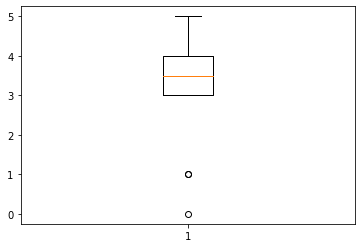

In [35]:
import matplotlib.pyplot as plt
plt.boxplot(df.Pressure)
plt.show()

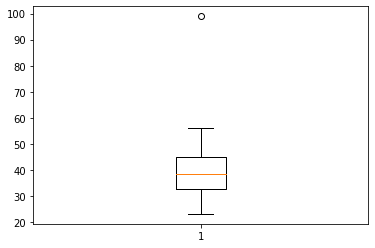

In [37]:
import matplotlib.pyplot as plt
plt.boxplot(df.Vibration)
plt.show()

In [38]:
# vibration
iqr = df.Vibration.quantile(0.75) - df.Vibration.quantile(0.25)
thresh = df.Vibration.quantile(0.75) + 1.5*iqr
df.Vibration[df.Vibration>thresh] = thresh

C:\Users\admin\AppData\Local\Temp/ipykernel_9536/1684100359.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Vibration[df.Vibration>thresh] = thresh


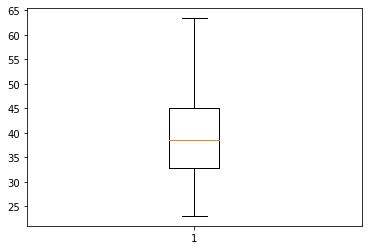

In [39]:
import matplotlib.pyplot as plt
plt.boxplot(df.Vibration)
plt.show()

In [40]:
df.Vibration.skew()

0.4787591378183896

In [41]:
# vibration

iqr = df.Pressure.quantile(0.75) - df.Pressure.quantile(0.25)

thresh = df.Pressure.quantile(0.25) - 1.5*iqr

df.Pressure[df.Pressure<thresh] = thresh

df.Pressure.skew()


C:\Users\admin\AppData\Local\Temp/ipykernel_9536/4204058605.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Pressure[df.Pressure<thresh] = thresh


-0.39843239905349087

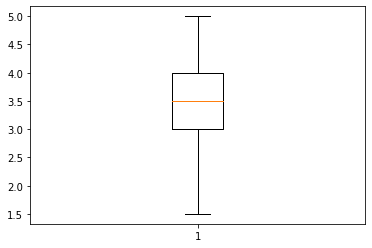

In [42]:
import matplotlib.pyplot as plt
plt.boxplot(df.Pressure)
plt.show()

## Handling unwanted columns

In [43]:
df.head()

,Dates,Temperature,Humidity,Pressure,Air Quality,Day id,Vibration
0,30-04-2018,218.000000,182.0,4.0,2.0,1,45.0
1,01-05-2018,1579.714286,182.0,3.0,2.0,2,56.0
2,02-05-2018,1579.714286,439.0,3.5,0.0,3,45.0
3,03-05-2018,2439.000000,53.0,5.0,1.0,4,23.0
4,04-05-2018,824.000000,444.0,5.0,1.0,5,35.0


In [44]:
df.drop(columns=['Day id'],inplace=True)

In [45]:
df.head()

,Dates,Temperature,Humidity,Pressure,Air Quality,Vibration
0,30-04-2018,218.000000,182.0,4.0,2.0,45.0
1,01-05-2018,1579.714286,182.0,3.0,2.0,56.0
2,02-05-2018,1579.714286,439.0,3.5,0.0,45.0
3,03-05-2018,2439.000000,53.0,5.0,1.0,23.0
4,04-05-2018,824.000000,444.0,5.0,1.0,35.0
